In [ ]:
pip install pandas
pip install beautifulsoup4
pip install 
pip install sns

In [ ]:
pip install scikit-learn

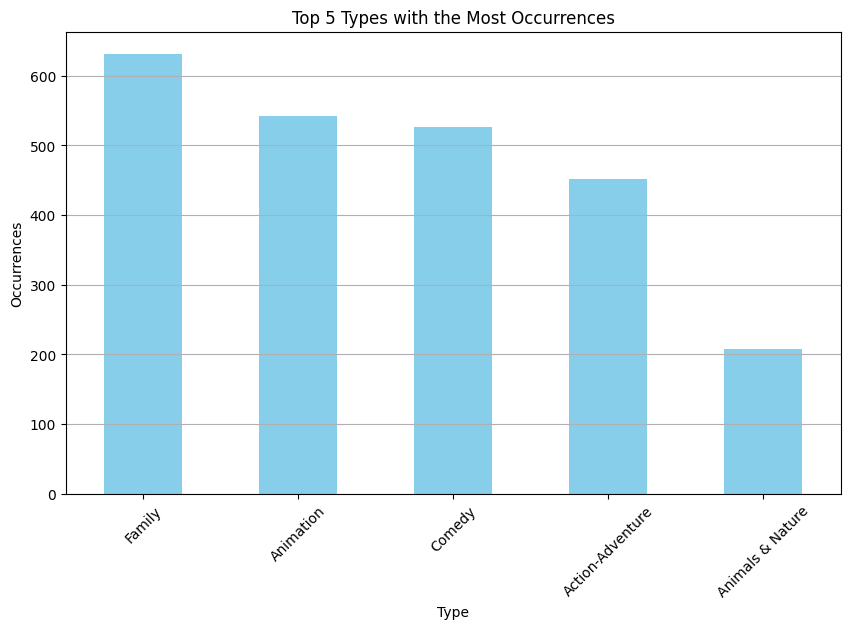

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a pandas DataFrame
data = pd.read_csv('disney.csv')

# Count occurrences of each type
type_counts = data['listed_in'].str.split(', ').explode()

# Select the top 5 types with the most occurrences
top_types = type_counts.value_counts().head(5)


# Plot the top 5 types with the most occurrences
plt.figure(figsize=(10, 6))
top_types.plot(kind='bar', color='skyblue')
plt.title('Top 5 Types with the Most Occurrences')
plt.xlabel('Type')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



C:\Users\StarLord\AppData\Local\Temp\ipykernel_15612\736275011.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_directors.index, y=top_directors.values, palette='coolwarm')
C:\Users\StarLord\AppData\Local\Temp\ipykernel_15612\736275011.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)


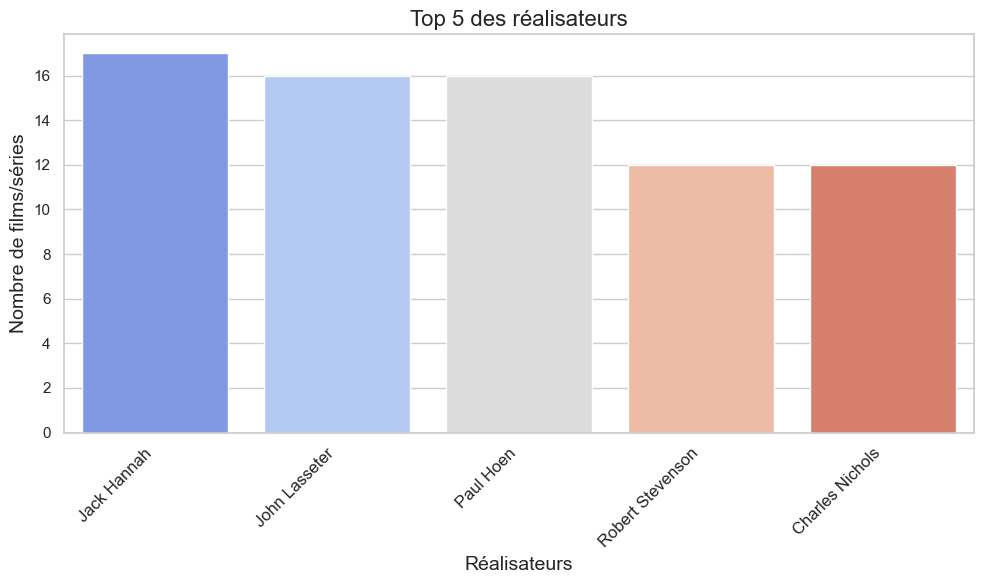

In [12]:


import seaborn as sns
top_directors = data['director'].value_counts().head(5)
#sns.barplot(x=top_directors.index, y=top_directors.values)
# plt.title('Top 5 des réalisateurs')
# plt.show()
sns.set(style="whitegrid")

# Création d'un graphique en barres pour les top réalisateurs
plt.figure(figsize=(10, 6))  # Ajustement de la taille du graphique
ax = sns.barplot(x=top_directors.index, y=top_directors.values, palette='coolwarm')

# Ajout du titre et des étiquettes des axes
plt.title('Top 5 des réalisateurs', fontsize=16)
plt.xlabel('Réalisateurs', fontsize=14)
plt.ylabel('Nombre de films/séries', fontsize=14)

# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)

# Affichage du graphique
plt.tight_layout()
plt.show()

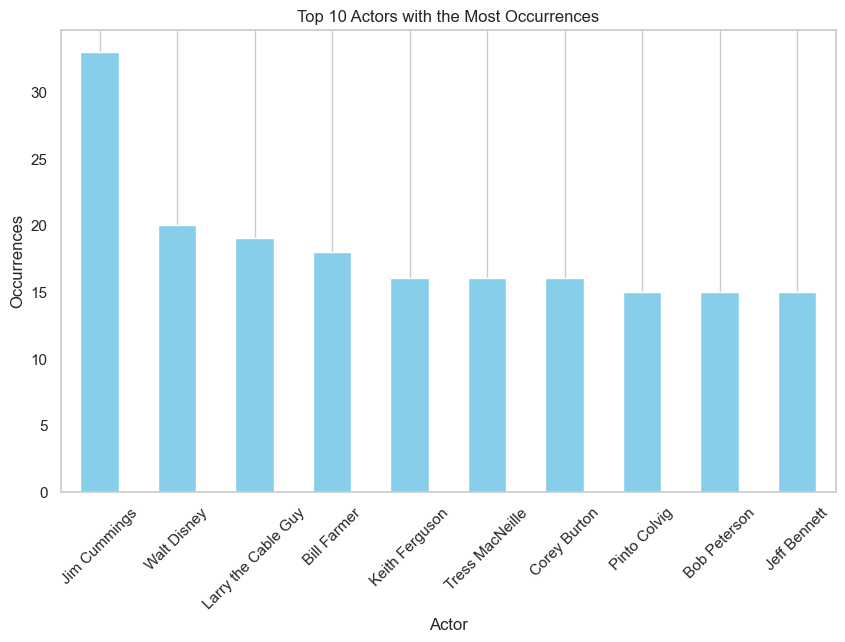

In [13]:
all_actors = [actor.strip() for sublist in data['cast'].dropna().str.split(',') for actor in sublist]

# Count occurrences of each actor
actor_counts = pd.Series(all_actors).value_counts()

# Select the top 10 actors with the most occurrences
top_actors = actor_counts.head(10)

# Plot the top 10 actors with the most occurrences
plt.figure(figsize=(10, 6))
top_actors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Actors with the Most Occurrences')
plt.xlabel('Actor')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\StarLord\AppData\Local\Temp\ipykernel_15612\2839024624.py:8: SyntaxWarning: invalid escape sequence '\d'
  tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+) Season').astype(float)
C:\Users\StarLord\AppData\Local\Temp\ipykernel_15612\2839024624.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+) Season').astype(float)
C:\Users\StarLord\AppData\Local\Temp\ipykernel_15612\2839024624.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same e

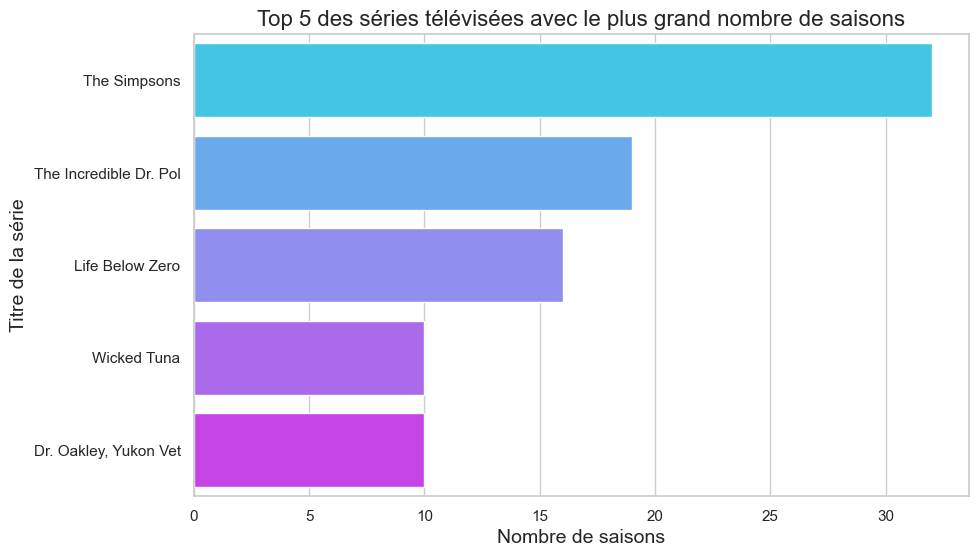

In [17]:
# Suppression des lignes avec des données manquantes dans la colonne 'duration'
#data = data.dropna(subset=['duration'])

# Filtrage pour ne garder que les séries télévisées
tv_shows = data[data['type'] == 'TV Show']

# Extraction du nombre de saisons à partir de la colonne 'duration'
tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+) Season').astype(float)

# Tri des séries par le nombre de saisons et sélection des cinq premières
top_tv_shows = tv_shows.sort_values(by='num_seasons', ascending=False).head(5)

# Vérification des données extraites
# print(tv_shows[['title', 'duration', 'num_seasons']].head())
# print(top_tv_shows[['title', 'num_seasons']])

# Création d'un graphique en barres pour visualiser les données
plt.figure(figsize=(10, 6))
sns.barplot(x='num_seasons', y='title', data=top_tv_shows, palette='cool')
plt.title('Top 5 des séries télévisées avec le plus grand nombre de saisons', fontsize=16)
plt.xlabel('Nombre de saisons', fontsize=14)
plt.ylabel('Titre de la série', fontsize=14)
plt.show()


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Suppression des lignes avec des données manquantes dans la colonne 'description'
#data = data.dropna(subset=['description'])
# TF-IDF des descriptions
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['description'].dropna()) #en cas d'utilisation du supression en haut ici on met: tfidf_matrix = tfidf.fit_transform(data['description'])

# Calcul de la matrice de similarité cosinus
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Fonction pour obtenir des recommandations
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = data.index[data['title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # top 5 similar contents
    movie_indices = [i[0] for i in sim_scores]
    return data['title'].iloc[movie_indices]

# Exemple d'utilisation
print(get_recommendations('Duck the Halls: A Mickey Mouse Christmas Special'))

1073    Mickey's Birthday Party
385        Toy Story of Terror!
1378                Toy Story 2
1023            Lonesome Ghosts
934            Hawaiian Holiday
Name: title, dtype: object


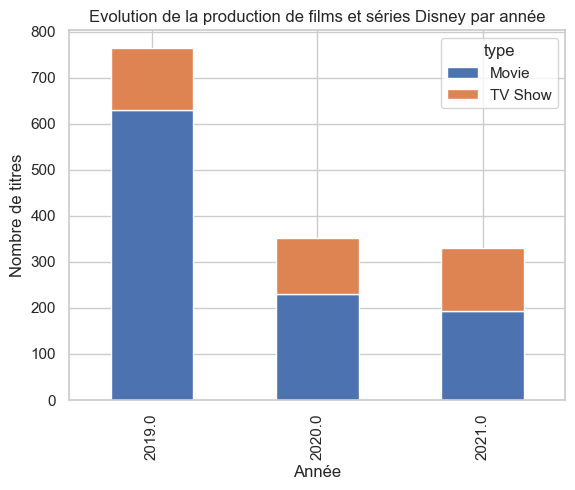

In [22]:
# yearly_counts = data.groupby(['year', 'type']).size().unstack(fill_value=0)
# yearly_counts.plot(kind='bar', stacked=True)
# plt.title('Comparaison entre séries télévisées et films par année')
# plt.show()

# Création d'une colonne 'year' pour le tri par année
data['year_added'] = pd.to_datetime(data['date_added']).dt.year

# Comptage par type et année (yearly_counts )
type_counts = data.groupby(['year_added', 'type']).size().unstack().fillna(0)

type_counts.plot(kind='bar', stacked=True)
plt.title('Evolution de la production de films et séries Disney par année')
plt.xlabel('Année')
plt.ylabel('Nombre de titres')
plt.show()